<a href="https://colab.research.google.com/github/DavidMercadoFaustino/Analyzing-Data-with-Python---IBM-DA0101EN/blob/master/Modulo_4_Model_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4 - Model Development
Objetivos:

*   Regressões Lineares Simples e Multipla
*   Modelo de avaliação usando a visualização
*   Regressão Polinomial e Pipelines
*   R² e erro quadrático médio
*   Predição e tomada de decisão


In [4]:
#importação das bibliotecas do Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
URL = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(URL)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# Regressão linear Simples e Multipla

As  regressões são métodos descritivos da análise de dados que permitem explorar e inferir a relação de uma variável de resposta com uma ou mais variáveis explicatórias. 



## Regressão linear simples
A regressão linear simples é um metodo que nos permite entender melhor a relação entre duas variaveis.

* Variável independente ou explicatória "X"
* Variável dependente ou de resposta "Y"

O resultado dessa regressão linear é uma função linear que prevê uma resposta "Y" em função de uma variação "X".

Função linear expressa dessa maneira:       
### **Y = a + bX**
Sendo que a e b sendo coeficiente assumindo numeros Reais e b sendo diferente de 0

In [5]:
# Criação de um objeto de regressão linear
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# Vamos olhar como a variavel 'highway-mpg' pode prever a variável 'price' dos carros. 
# Então colocamos nas variaveis X e Y
X = df[['highway-mpg']]
Y = df['price']

In [7]:
# Colocar a função fit no modelo Linear usando o 'highway-mpg'
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# Vamos ver as predições
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [11]:
#Vamos ver a função linear da regressão entre as duas variavels
a = lm.intercept_
b = lm.coef_
print('A função dessa relação é Price =', a, '+', b,'Highway-MPG')

A função dessa relação é Price = 38423.3058581574 + [-821.73337832] Highway-MPG


Aqui vemos que a função linear pode ser expressa na relação:
**Price = 38423.3058581574 + [-821.73337832] Highway-MPG**

In [13]:
# Agora vamos ver a relação entre o 'engine-size' e o 'price'
lm1 = LinearRegression()
lm1.fit( df[['engine-size']],df[['price']])
a1 = lm1.intercept_
b1 = lm1.coef_
print('A função dessa relação é Price =', a1, '+', b1,'Engine-Size')

A função dessa relação é Price = [-7963.33890628] + [[166.86001569]] Engine-Size


Aqui vemos que a função linear pode ser expressa na relação: **Price = [-7963.33890628] + [[166.86001569]] Engine-Size**

## Regressão Linear Multipla

Pela lógica a regressão linear multipla vai depender de duas ou mais variaveis explicatórias para uma variável de resposta. Maioria dos modelos regressivos são regressões multiplas.
Então nesse metodo de analise teremos: 

Y = Variável dependente

X1 = Variável independente 1

X2 = Variável independente 2

X3 = Variável independente 3

Xn =  Variável independente n

a = coeficiente real

b1 = coeficiente real 1 diferente de 0

b2 = coeficiente real 2 diferente de 0

b3 = coeficiente real 3 diferente de 0

bn = coeficiente real n diferente de 0

A função dessa regressão sera: 

### **Y = a + b1X1 + b2X2 + b3X3 + ... + bnXn**

In [14]:
# vamos aplicar esse metodo usando as variaveis 'horsepower', 'curb-weight', 'engine-size', 'highway-mpg'
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [15]:
lm.fit(Z,df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
lm.intercept_

-15806.62462632922

In [17]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

Aqui vemos que a função linear pode ser expressa na relação: 

**Price = -15806.62462632922 + 53.49574423 Horsepower + 4.70770099 Curb-Weight + 81.53026382 Engine-Size + 36.05748882 Highway-MPG**

# Vizualização das regressões
Com as vizualizações podemos ver como essas variaveis se comportam dentro do gráfico. Assim podemos analisar a relação entre as duas variáveis, levando em consideração a força e a direção da correlação.

(0.0, 48164.334062837515)

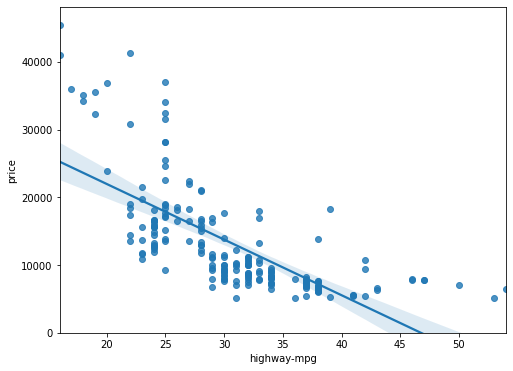

In [19]:
#primeiro vamos analisar a relação da variável 'highway-mpg"' e a 'price'
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

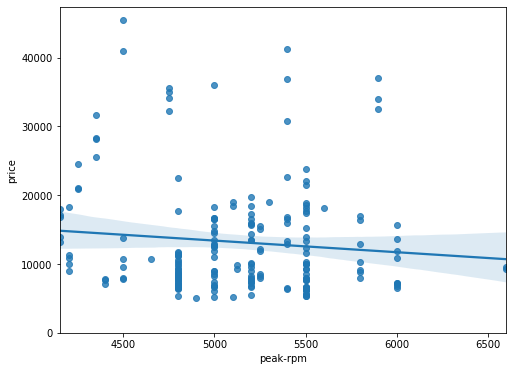

In [20]:
# Agora o gráfico usando a 'peak-rpm'
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

(0.0, 47541.36474961948)

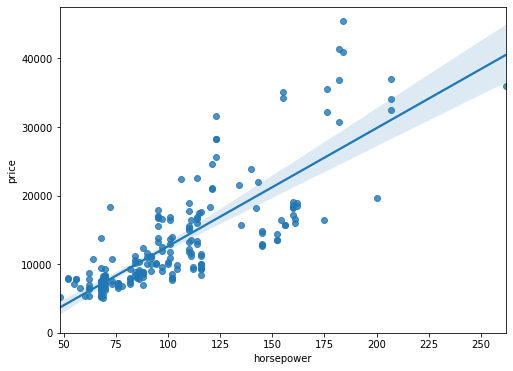

In [21]:
# E finalizando a relação com a 'horsepower'
plt.figure(figsize=(width, height))
sns.regplot(x="horsepower", y="price", data=df)
plt.ylim(0,)

Apartir dos três gráficos podemos observar que os pontos do grafico 1 e 3 tem uma distribuição mais alinhada a linha de tendencia do que a do  grafico dois. Outra questão que podemos observar é a direção da linha vemos no grafico um uma direção decendente e no terceiro gráfico uma direção acendente. Essa direção pode também ser observada nas expressões das funções onde o coeficiente do grafico 2 temos um numero negativo e no gráfico 3 temos um numero positivo. 

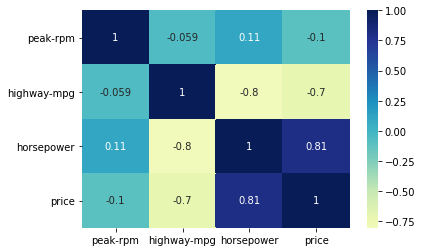

In [29]:
#outra forma de observar a relação das variaveis.
df_cor = df[["peak-rpm","highway-mpg",'horsepower',"price"]].corr()
ax = sns.heatmap(df_cor,  cmap="YlGnBu", center=0, annot=True)

## Analise de resíduos
O Resíduo é dado pela diferença entre a variável resposta observada Y  e a variável resposta estimada Yhat. Assim temos que o residuo é a distancia entre o ponto da base de dado até a linha de regressão.

Essa analise podemos plotar em um grafico para analisar como ela se comporta.

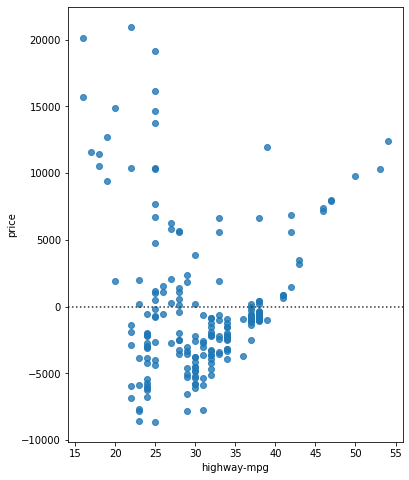

In [31]:
# Vamos fazer analise dos resíduos da regressão da variavel 'highway-mpg'
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

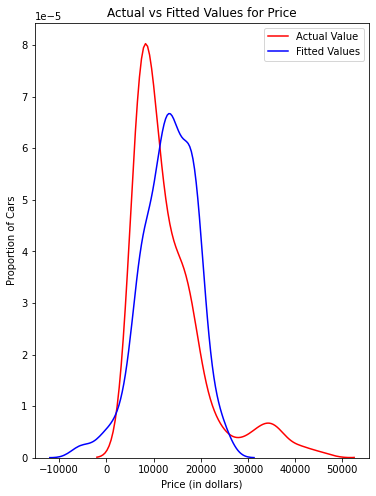

In [32]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()